# Week 4: Homework 1 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

The goal of this practice is to analyze the performance of different estimators on the Diabetes problem and we will analyze, by means of different approximations, which input features are more relevant to solve this problem. 

Note that previous week we already worked on Diabetes database, but we only used one of the input variable (BMI) to construct the regression model; in this practice we will use all the input features jointly.

To solve these notebook, complete the following sections implementing the solution that you consider most appropriate and showing the results that you find most interesting. For the evaluation of this notebook,  we will take into account the methodology used, the solution adopted, the presentation of the results and the conclusions obtained at the light of the results.


## 1. Data loading and preprocessing

Following the ML pipeline, start loading the data, creating the partitions that you consider necessary and carrying out the preprocessing that yu need.

Keep in mind that there is no single valid solution, and different reasons can lead you to make different data partitions or apply different normalizations. So **please justify the steps you are taking**.

In this first cell, we write all the imports. This way we have a clearer place to set our libraries requirements.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

%matplotlib inline

Number of data: 442


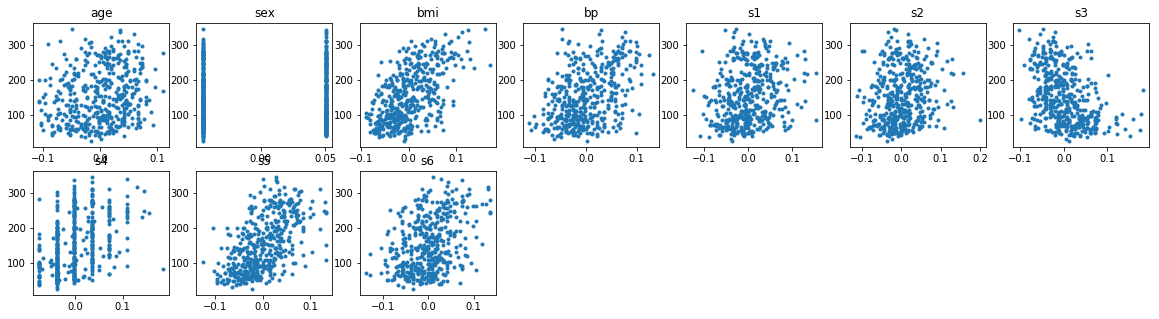

Number of data: 442


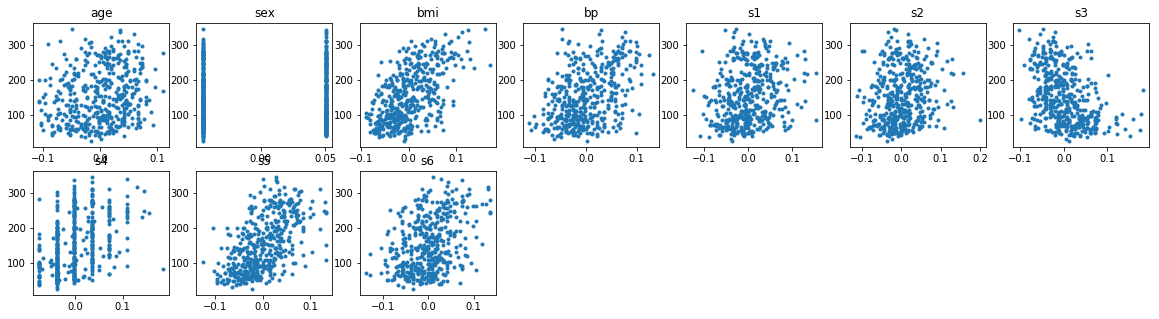

In [183]:
## 1. Data loading and preprocessing

diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
feature_names = diabetes.feature_names

print('Number of data: %s' %X.shape[0])
D = X.shape[1]

plt.figure( figsize=(20,5))
for d in range (D):
  plt.subplot(2,7,d+1)
  plt.plot(X[:,d],Y,'.',)
  plt.title(feature_names[d])

# Include your code here (create as many cells as you need)

Since we want to predict the Diabetes disease according to this features, what means that distance measures between features, standardarization will be the best normalization method for our case. Also, since the features have different weights, this might lead to award wrong "importance" to the features.

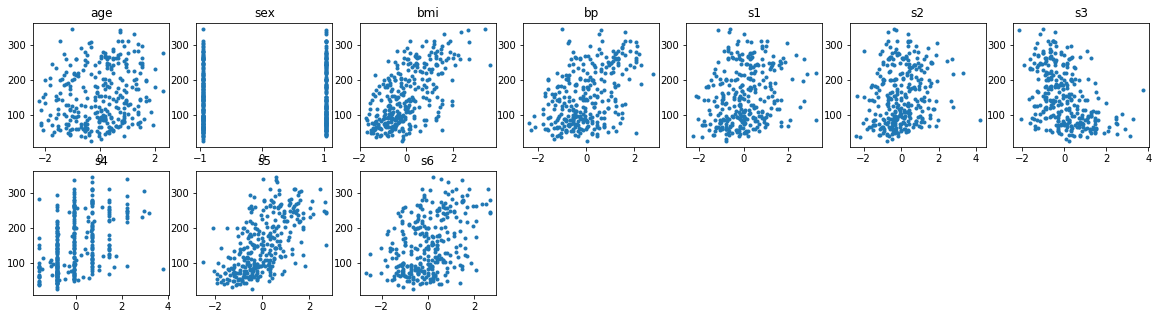

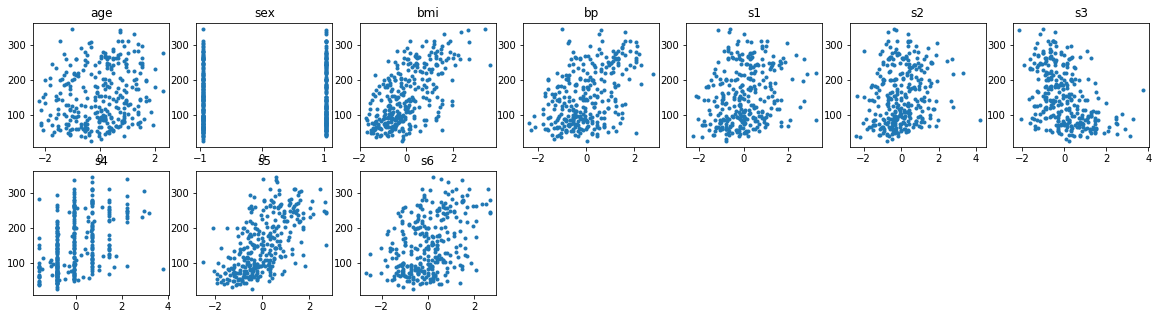

In [184]:
#Let's apply standard scaling to all the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Data normalization
transformer = StandardScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm =  transformer.transform(X_test)

plt.figure( figsize=(20,5))
for d in range (D):
  plt.subplot(2,7,d+1)
  plt.plot(X_train_norm[:,d],Y_train,'.',)
  plt.title(feature_names[d])

X_train = X_train_norm
X_test = X_test_norm


## 2. Performance evaluation 

Now, analyze the performance of different estimators to predict the diabetes progression from all the available features. 

As possible estimators to be included in this study, we will consider those studied so far: K-NN, linear regressor, polynomial regressor and their regularized versions. Please, in case these methods have any free hiperparameter, **clearly justify** the selection of their optimal values.

As you know, for the performance evaluation, we have seen several metrics. So, here, you can use one or several of them. But, regardless of the used metric, don't forget to include a final analysis comparing the performance of different methods and trying to justify the obtained results.

## 2.1. KNN


First of all, we train a KNN by doing first a cross validation of the parameter K.

Afterwards, we plot the evolution of the mean squared error in regard to the value of K.

Then we plot the best algorithm and train a final one (bestKNNRegressor) and show it results.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV finished
Cross validation results:


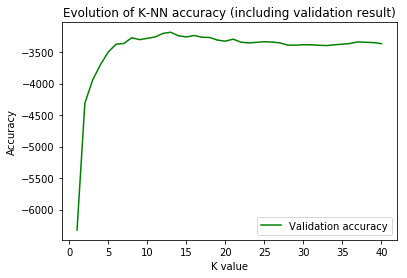

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')
MSE =  3246.758464207857
R2 score =  0.363566810735667
MAE =  45.5534991324465


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV finished
Cross validation results:


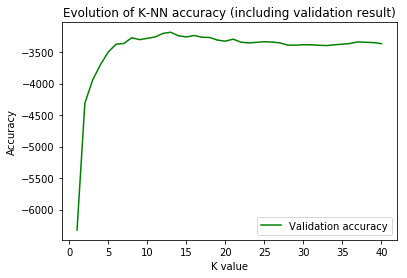

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')
MSE =  3246.758464207857
R2 score =  0.363566810735667
MAE =  45.5534991324465


In [185]:
#1. KNN

#First, we need to select the best parameters in order to train our model

rangeK = np.arange(1, 41)
param = [{'n_neighbors': rangeK}]

clf_base = KNeighborsRegressor()
clf = GridSearchCV(KNeighborsRegressor(), param, cv = 10, scoring = 'neg_mean_squared_error')
clf.result = clf.fit(X_train, Y_train)

print('CV finished')
print("Cross validation results:")

paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

# Selecting validation error (mean values)
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(rangeK, vect_val,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy (including validation result)')
plt.show()

K_opt = clf.best_params_.get('n_neighbors')
print(clf.best_estimator_)

#now that we have the best estimator, lets train the final model and evaluate the performance

bestKNNRegressor = KNeighborsRegressor(n_neighbors= K_opt)
bestKNNRegressor.fit(X_train, Y_train)
MSE_KNN = mean_squared_error(Y_test, bestKNNRegressor.predict(X_test))
R2_KNN = r2_score(Y_test, bestKNNRegressor.predict(X_test))
MAE_KNN = mean_absolute_error(Y_test, bestKNNRegressor.predict(X_test))

print('MSE = ', MSE_KNN)
print('R2 score = ', R2_KNN)
print('MAE = ', MAE_KNN)


## 2.2. LINEAR REGRESSOR


## 2.2.1. NON REGULARIZED LR


In this section we train a normal Linear Regressor. Sklearn provides a library with a Linear Regressor class that we could easely use, but in this case, we prefer to use the matrix of the weights given by the equation learned in class.

This way, we can see another approach to the solution.

In [186]:
#2. Linear Regressor

X_train.shape

X_train_e = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test_e = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
w_start = np.linalg.inv(np.transpose(X_train_e).dot(X_train_e)).dot(np.transpose(X_train_e).dot(Y_train))

predictions = X_test_e @ w_start

MSE_test = np.mean((Y_test - predictions)**2)

MSE_LR = mean_squared_error(Y_test, predictions)
R2_LR = r2_score(Y_test, predictions)
MAE_LR = mean_absolute_error(Y_test, predictions)

print('MSE = ', MSE_LR)
print('R2 score = ', R2_LR)
print('MAE = ', MAE_LR)

MSE =  3097.1461383877995
R2 score =  0.39289398450747537
MAE =  44.61794011407203
MSE =  3097.1461383877995
R2 score =  0.39289398450747537
MAE =  44.61794011407203


## 2.2.2. LR WITH L1

Sklearn provides a Lasso class in order to create Lasso Linear Regressors. By using it, we have to be carefull in order to choose an optimum value of the parameter alpha, so we cross validate its value.

The method to cross validate the parameters used is the Gris Search CV. This method provides, given a sample of the parameters to estimate, the best combination of the parameters to obtain the best result.

This way, we obtained an optimum value of the parameter alpha (within the array of the alpha values given).

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV finished
Cross validation results:


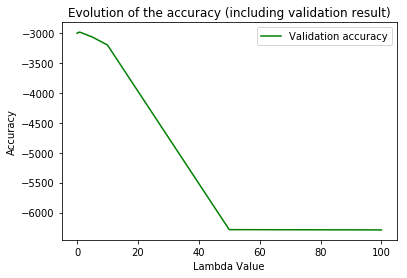

MSE =  3117.517811561041
MAE =  44.856490485043636


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV finished
Cross validation results:


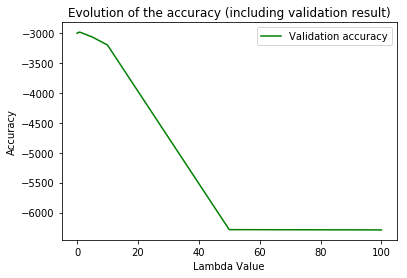

MSE =  3117.517811561041
MAE =  44.856490485043636


In [187]:
alphaValues = [0.001,0.005, 0.01,0.05,0.1, 0.5,1, 5, 10, 50, 100]
param = [{'alpha': alphaValues}]

clf_base = Lasso()
clf = GridSearchCV(Lasso(), param, cv = 10, scoring = 'neg_mean_squared_error')
clf.result = clf.fit(X_train, Y_train)

print('CV finished')
print("Cross validation results:")

paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

# Selecting validation error (mean values)
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(alphaValues, vect_val,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('Lambda Value')
plt.ylabel('Accuracy')
plt.title('Evolution of the accuracy (including validation result)')
plt.show()

best_alpha = clf.best_params_.get('alpha')
clf = Lasso(alpha=best_alpha)
clf.fit(X_train, Y_train)

MSE_LR_L1 = mean_squared_error(Y_test, clf.predict(X_test))
MAE_LR_L1 = mean_absolute_error(Y_test, clf.predict(X_test))

print('MSE = ', MSE_LR_L1)
print('MAE = ', MAE_LR_L1)


## 2.2.3. LR WITH L2

Sklearn provides a Ridge class in order to create Ridge Linear Regressors. By using it, we have to be carefull in order to choose an ootimum value of the parameter alpha (what we've called lambda)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
No handles with labels found to put in legend.


CV finished
Cross validation results:


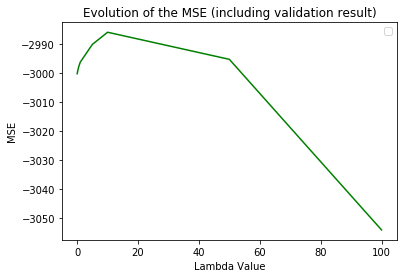

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
MSE =  3099.200952550966
MAE =  44.664135792566256


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
No handles with labels found to put in legend.


CV finished
Cross validation results:


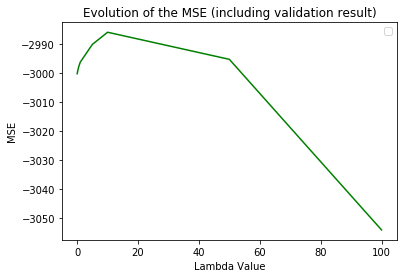

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
MSE =  3099.200952550966
MAE =  44.664135792566256


In [188]:
lambdaValues = [0.001,0.005, 0.01,0.05,0.1, 0.5,1, 5, 10, 50, 100]
param = [{'alpha': lambdaValues}]

clf_base = Ridge()
clf = GridSearchCV(Ridge(), param, cv = 10, scoring = 'neg_mean_squared_error')
clf.result = clf.fit(X_train, Y_train)

print('CV finished')
print("Cross validation results:")

paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

# Selecting validation error (mean values)
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(lambdaValues, vect_val,'g')
plt.legend()
plt.xlabel('Lambda Value')
plt.ylabel('MSE')
plt.title('Evolution of the MSE (including validation result)')
plt.show()

best_lambda = clf.best_params_.get('alpha')
print(clf.best_estimator_)
clf = Ridge(alpha=best_lambda)
clf.fit(X_train, Y_train)

MSE_LR_L2 = mean_squared_error(Y_test, clf.predict(X_test))
MAE_LR_L2 = mean_absolute_error(Y_test, clf.predict(X_test))

print('MSE = ', MSE_LR_L2)
print('MAE = ', MAE_LR_L2)

## 2.3. POLYNOMIAL REGRESSOR

## 2.3.1. NON REGULARIZED POLYNOMIAL REGRESSOR

In this polynomial regressor, we need to select the optimum value of the degree. We used another approch, the Pipeline. First we define the steps to execute and then we set the best params in order to do a final training.

In [189]:
steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',LinearRegression())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)

nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)

pipe_grid_search.predict(X_test)
MSE_test = np.mean((Y_test-pipe_grid_search.predict(X_test))**2)

print('The best degree for the Polinomial Regressor is: ', pipe_grid_search.best_params_['poly__degree'])

print('MSE: ', MSE_test)

The best degree for the Polinomial Regressor is:  1
MSE:  3097.1461383877972
The best degree for the Polinomial Regressor is:  1
MSE:  3097.1461383877972


## 2.3.2. PR WITH L1

In this approach, we decided to use the method defined in class. This way we have different tools to evaluate.

In [0]:
#3. Polynomial Regressor

def learnPolyLR_L1(X_train, Y_train, X_test, Y_test, n_degree, lamb):


  # Select id_feat and create polynomial version of training and test data
  Ntr = X_train.shape[0]
  Ntst = X_test.shape[0]

  # We are not using the columns of ones anymore
  polynomial_features = PolynomialFeatures(degree=n_degree, include_bias=False)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol)  # fit() learns mean and std
 
  X_train_pol = transformer.transform(X_train_pol)
  X_test_pol =  transformer.transform(X_test_pol)

 
  # Compute Lasso Regression solution
  clf = Lasso(alpha=lamb, fit_intercept=True, tol=0.1) # We add the intercept here (the columns of ones)
  clf.fit(X_train_pol, Y_train) 
  
  # Save weight values
  w_star = np.zeros((X_train_pol.shape[1]+1,))
  w_star[0] = clf.intercept_
  w_star[1:] = clf.coef_
  
 
  # Evaluate train error
  f_tr = clf.predict(X_train_pol)
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  
  # Evaluate test error
  f_test= clf.predict(X_test_pol)
  MSE_test = np.mean((Y_test-f_test)**2)

  return w_star, MSE_train, MSE_test

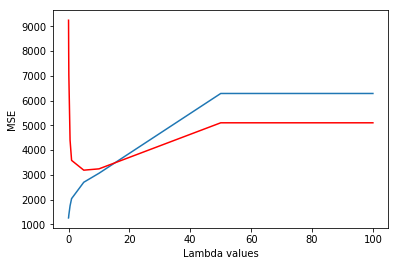

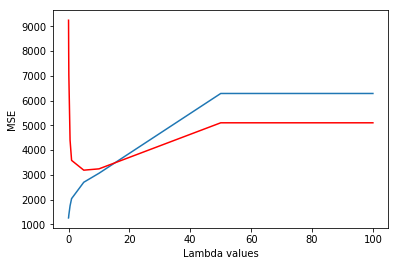

In [191]:
lambdaValues = [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
MSE_test_Values = []
MSE_train_Values = []

for value in lambdaValues:
  w_star, MSE_train, MSE_test = learnPolyLR_L1(X_train, Y_train, X_test, Y_test, 3, value)
  MSE_test_Values = np.append(MSE_test_Values, MSE_test)
  MSE_train_Values = np.append(MSE_train_Values, MSE_train)

plt.figure()
plt.ylabel('MSE')
plt.xlabel('Lambda values')

plt.plot(lambdaValues, MSE_train_Values)
plt.plot(lambdaValues, MSE_test_Values, 'r')

What we really care is that this graphic doesn't give us a good result of the lammda values. We need to cross validate its value as we've been doing till now.

In [192]:

steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',Lasso(tol=0.1))]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)

nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=lambdaValues)
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)

pipe_grid_search.predict(X_test)
MSE_test = np.mean((Y_test-pipe_grid_search.predict(X_test))**2)

print('MSE', MSE_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233313.0934943088, tolerance: 157341.1368421053
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219106.19739253103, tolerance: 153893.54574898788
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246336.3000632394, tolerance: 159202.71093117414
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233185.534213

MSE 3201.902183838409


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233313.0934943088, tolerance: 157341.1368421053
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219106.19739253103, tolerance: 153893.54574898788
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246336.3000632394, tolerance: 159202.71093117414
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233185.534213

MSE 3201.902183838409


## 2.3.3. PR WITH L2


Now that we know, that the MSE on training and test are not good ways to CV the parameter for a regularized algorithm, we just do a Pipeline on the Ridge Regressor.

In [193]:

steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',Ridge(tol=0.1))]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)

nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[1,5,10,50,100,500])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)

pipe_grid_search.predict(X_test)
MSE_test = np.mean((Y_test-pipe_grid_search.predict(X_test))**2)

print('MSE for a Ridge Polynomial Regressor:', MSE_test)

MSE for a Ridge Polynomial Regressor: 3099.200952550966
MSE for a Ridge Polynomial Regressor: 3099.200952550966


## 3. Study of feature relevance and feature selection

In this last section, using different criteria, you have to analyze the relevance of the input features. Thus, you will have to find a subset with the $D'$ most relevant features and, using this subset of features, analyze the final performance of a regressor (for the sake of simplicity, consider a linear ridge regressor as final regressor).

To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on the validation error**: if there were $D$ input features, we could try to train $D$ regressors where each regressor uses one (and only one) different input feature. According to the final perfomance of each regressor (evaluated on a validation set or with a CV proccess), we could rank the features (the most relevant feature is the one providing the lowest error). Using this ranking, we can select the $D'$ most relevant features as the $D'$ top-ranked ones. Note that this scheme only analyzes the isolated relevance of each feature to predict the output; so, it is said that this approach is *univariate*.

 <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/FeatureRanking.png" width="90%" > 


2. **Greedy search based on the validation error**: approach (1) has the disadvantage of not taking into account relationships between features. For instance, method (1) would not realize that two features can be rendundant or that a feature, that is useless by itself, can be very useful combined with another feature. To overcome this drawback, we should have to analyze subsets of features; however, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Fordward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" > 

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" > 

3. **Ridge linear regression with a prunning**: We know that the L2 regularization limits the magnitude of the weight vector to avoid overfitting problems, but these weigths do not become to null. However, in a linear model, *the weight magnitude can be an indicative of the feature relevance* and, unlike approach (1), all features are analyzed at the same time (*multivariate approach*). Use the weigth magnitude to generate a ranking of features and, later, use this ranking to select the $D'$ most relevant features.

4. **Lasso linear regression**: In this case, the L1 penalty allows us to directly eliminate some of the input features. Explore different values of the regularization parameter $\lambda$ to get a sequence of selected feature sets (from a single feature to all features).


5. **Elastic-net linear regression**: This last approach combines L1 and L2 regularizations, thus including the advantages of both methods. Varying adequately their regularization parameters, create a sequence of feature selection subsets. 



Final comments:

* Due to part of the feature selection process involves selecting the optimum number of features, to avoid additional complexity (having to validate this number), you can analyze the different methods by exploring the curves of MSE vs. number of selected features ($D'$).

* It is not necessary to apply all these methods to complete this notebook (you can choose, at least, three of them). In fact, the implementation of greedy search approaches require an advanced knowledge of Python; so take this into account when you design your notebook solution.

* **Please, analyze in detail the different results, pointing out the advantages/disadvantages of each feature selection scheme**. Think about the behaviour of the different criteria in cases where a feature is irrelevant or there are redundant features. Additional experiments helping you to support any of your conclusions will be welcome.

## 3.1. Relevance ranking based

In this approach, we do a feature selection based on the Relevance ranking based. This method trains first a cross validated Ridge Linear Regressor (in our case), in order to get a ranking of the features based on the metric we want (MSE in our case).

Once we have a sorted list of the features based on the MSE, we just start training models adding at each iteration, one feature, this way, we can check which is the best number of features for our model.

Text(0.5, 1.0, 'Score evolution for features addition')

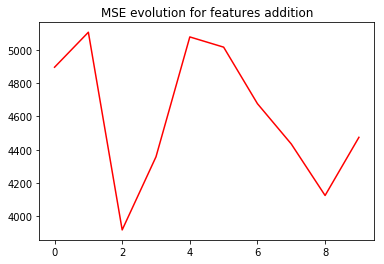

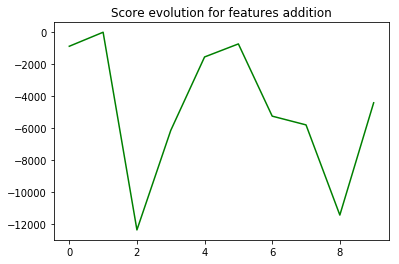

Text(0.5, 1.0, 'Score evolution for features addition')

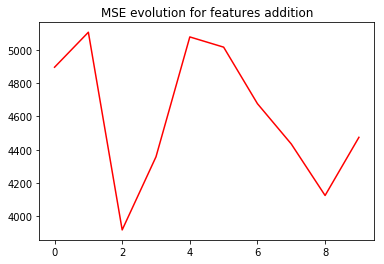

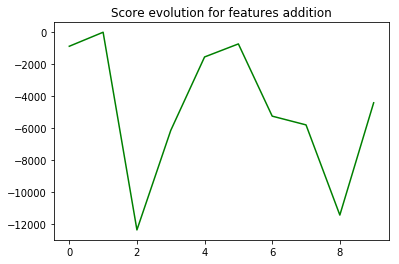

In [194]:
#Let's use the Relevance ranking based on the validation error as a first method to select the best features

mse_ranking_per_feature = []
scores = []
D = X.shape[1]

for d in range (D):
  X_train_Feature = X_train_norm[:, d][:,np.newaxis]
  X_test_Feature = X_test_norm[:, d][:,np.newaxis]
  ridge = RidgeCV(alphas= (0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200))
  ridge.fit(X_train_Feature, Y_train)  
  mse_ranking_per_feature.append(mean_squared_error(Y_test, ridge.predict(X_test_Feature)))
  scores.append(ridge.score(ridge.predict(X_test_Feature).reshape(-1, 1), Y_test))

plt.figure()
plt.plot(range(D), mse_ranking_per_feature, 'r')
plt.title('MSE evolution for features addition')

plt.figure()
plt.plot(range(D), scores, 'g')
plt.title('Score evolution for features addition')




Now that we have the overall error for each feature, we can easely show the variation of the error by training fom 1 to 10 features in order to select the D' best features to train our model with a Linear Regresor.

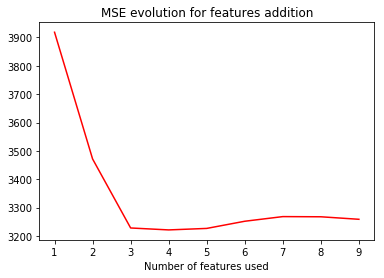

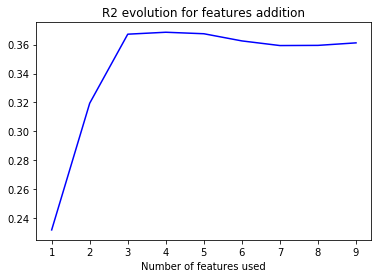

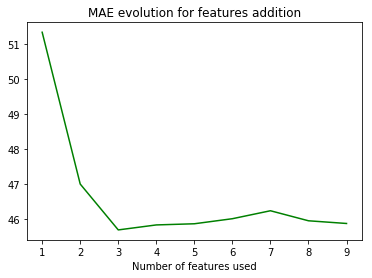

For this feature selection method, we can conclude, that the best features for the training per metric is:
MSE:  [2 8 3 7]
R2:  [2 8 3 7]
MSE:  [2 8 3]


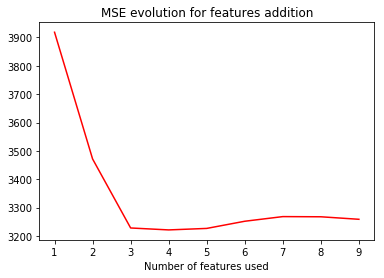

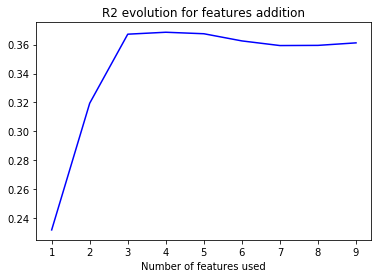

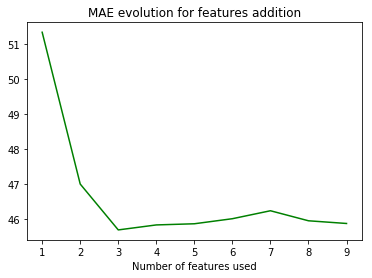

For this feature selection method, we can conclude, that the best features for the training per metric is:
MSE:  [2 8 3 7]
R2:  [2 8 3 7]
MSE:  [2 8 3]


In [195]:
features_sorted_byError = np.argsort(mse_ranking_per_feature, axis = 0)

MSE_RankingBased = []
MAE_RankingBased = []
R2_RankingBased = []

for i in range(1, len(features_sorted_byError)):
  ridge_with_Fselection = RidgeCV(alphas= (0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200), fit_intercept = True)

  # In the next line, we can see how in each iteration, it will be taking the an extra feature than the previouse iteration
  # So in order to check that, we can just uncomment the next code line:

  # print('Features selected for training number',  i, ':', features_sorted_byError[0:i])

  ridge_with_Fselection.fit(X_train[:, features_sorted_byError[0:i]], Y_train)
  
  predictions = ridge_with_Fselection.predict(X_test[:, features_sorted_byError[0:i]])

  MSE_RankingBased.append(mean_squared_error(Y_test, predictions))
  R2_RankingBased.append(r2_score(Y_test, predictions))
  MAE_RankingBased.append(mean_absolute_error(Y_test, predictions))

plt.figure()
plt.plot(range(1, len(features_sorted_byError)), MSE_RankingBased, 'r')
plt.title('MSE evolution for features addition')
plt.xlabel('Number of features used')

plt.figure()
plt.plot(range(1, len(features_sorted_byError)), R2_RankingBased, 'b')
plt.title('R2 evolution for features addition')
plt.xlabel('Number of features used')

plt.figure()
plt.plot(range(1, len(features_sorted_byError)), MAE_RankingBased, 'g')
plt.title('MAE evolution for features addition')
plt.xlabel('Number of features used')
plt.show()

print('For this feature selection method, we can conclude, that the best features for the training per metric is:')
print('MSE: ', features_sorted_byError[0:MSE_RankingBased.index(min(MSE_RankingBased))+1])
print('R2: ', features_sorted_byError[0:R2_RankingBased.index(max(R2_RankingBased))+1])
print('MSE: ', features_sorted_byError[0:MAE_RankingBased.index(min(MAE_RankingBased))+1])



We can see that the 3 metrics have more or less the same evolution by adding features. With just the first one, the values are pretty bad, but quickly, when adding a second one, the value get better. Finally, by plotting the results and getting the best MSE, MAE or R2, we get the best number of features to train the Ridge Linear Regressor.

As we can see, from the 3rd-4th feature, the metric converges, this tells us that the improvement is low. If we train again, we might get different values and the same convergence.

## 3.2. Ridge Linear Regression with Prunning

Here, we will do just a cross validated training in order to see the weights of the model.

Then we will evaluate the performance by adding features on a ranking based on the absolute value of the weight.


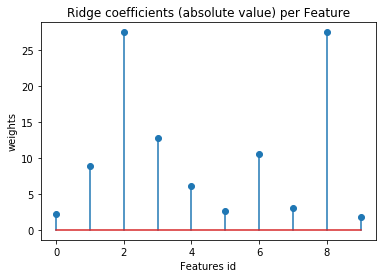

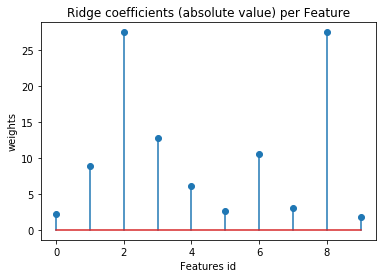

In [196]:
#As second method we'll use the Ridge linear regression with a prunning

plt.figure()

ridge_with_prunning = RidgeCV(alphas= (0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200), fit_intercept = True)
ridge_with_prunning.fit(X_train, Y_train)
weights_byAbsValue = abs(ridge_with_prunning.coef_)
index_weights_byAbsValue = np.argsort(np.abs(ridge_with_prunning.coef_))[::-1]

plt.stem(range(D), weights_byAbsValue)
plt.xlabel('Features id')
plt.ylabel('weights')
plt.title('Ridge coefficients (absolute value) per Feature')
plt.axis('tight')
plt.show()

After having a list of the coefficients/weights of our model, we sort it in order to have a ranking based on the absolute value of the weights.

Then, we do the same process as in the first feature selection method, we train and for each iteration we add a new feature following the weight ranking.

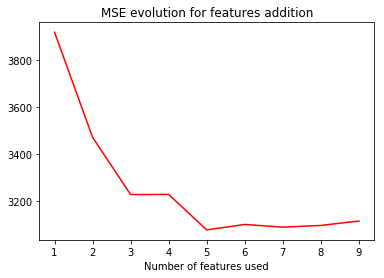

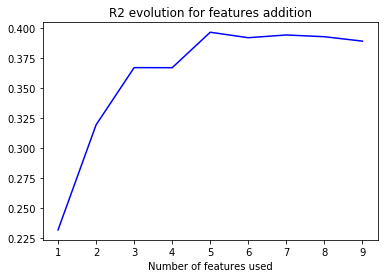

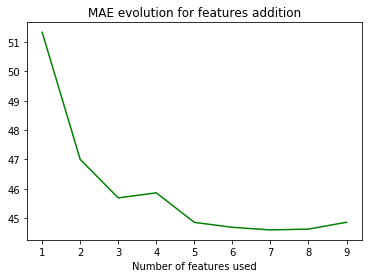

For this feature selection method, we can conclude, that the best features for the training per metric is:
MSE:  [2 8 3 6 1]
R2:  [2 8 3 6 1]
MAE:  [2 8 3 6 1 4 7]


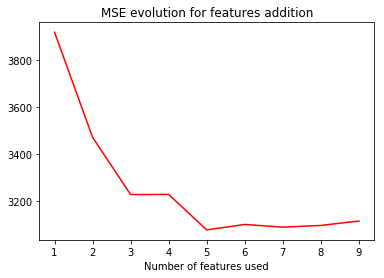

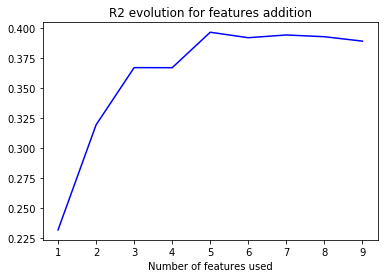

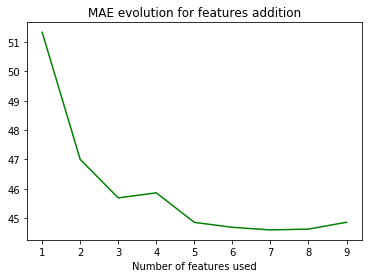

For this feature selection method, we can conclude, that the best features for the training per metric is:
MSE:  [2 8 3 6 1]
R2:  [2 8 3 6 1]
MAE:  [2 8 3 6 1 4 7]


In [197]:
MSE_Prunning = []
MAE_Prunning = []
R2_Prunning = []

for i in range(1, len(index_weights_byAbsValue)):
  ridge_with_prunning = RidgeCV(alphas= [0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200], fit_intercept = True)

  # In the next line, we can see how in each iteration, it will be taking the an extra feature than the previouse iteration
  # So in order to check that, we can just uncomment the next code line:

  # print('Features selected for training number',  i, ':', index_weights_byAbsValue[0:i])

  ridge_with_prunning.fit(X_train[:, index_weights_byAbsValue[0:i]], Y_train)
  
  predictions = ridge_with_prunning.predict(X_test[:, index_weights_byAbsValue[0:i]])

  MSE_Prunning.append(mean_squared_error(Y_test, predictions))
  R2_Prunning.append(r2_score(Y_test, predictions))
  MAE_Prunning.append(mean_absolute_error(Y_test, predictions))

plt.figure()
plt.plot(range(1, len(index_weights_byAbsValue)), MSE_Prunning, 'r')
plt.title('MSE evolution for features addition')
plt.xlabel('Number of features used')

plt.figure()
plt.plot(range(1, len(index_weights_byAbsValue)), R2_Prunning, 'b')
plt.title('R2 evolution for features addition')
plt.xlabel('Number of features used')

plt.figure()
plt.plot(range(1, len(index_weights_byAbsValue)), MAE_Prunning, 'g')
plt.title('MAE evolution for features addition')
plt.xlabel('Number of features used')
plt.show()

print('For this feature selection method, we can conclude, that the best features for the training per metric is:')
print('MSE: ', index_weights_byAbsValue[0:MSE_Prunning.index(min(MSE_Prunning))+1])
print('R2: ', index_weights_byAbsValue[0:R2_Prunning.index(max(R2_Prunning))+1])
print('MAE: ', index_weights_byAbsValue[0:MAE_Prunning.index(min(MAE_Prunning))+1])

As we can see, the ranking is similar to the one we got in the first method. Also the metrics converse more or less at the same point.


## 3.3. Elastic-Net

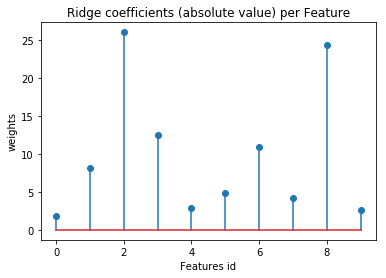

As a first train, we trained our model with all the features and got the following results:

Best l1: 0.01
Best alpha: 0.1
MSE: 3063.548873171971
R2: 0.3994797576370718
MAE: 44.38933049086965


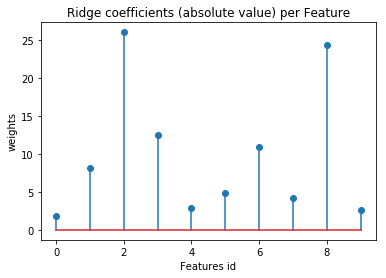

As a first train, we trained our model with all the features and got the following results:

Best l1: 0.01
Best alpha: 0.1
MSE: 3063.548873171971
R2: 0.3994797576370718
MAE: 44.38933049086965


In [198]:
elasticNet = ElasticNetCV(l1_ratio = [0.001, 0.01, 0.5, 0.7, 0.9, 0.95, 0.99, 1], alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5], cv=10)
elasticNet.fit(X_train, Y_train)

predictions = elasticNet.predict(X_test)

MSE_ElasticNet = mean_squared_error(Y_test, predictions)
R2_ElasticNet = r2_score(Y_test, predictions)
MAE_ElasticNet = mean_absolute_error(Y_test, predictions)

weights_byAbsValue = abs(elasticNet.coef_)
index_weights_byAbsValue = np.argsort(np.abs(elasticNet.coef_))[::-1]

plt.stem(range(D), weights_byAbsValue)
plt.xlabel('Features id')
plt.ylabel('weights')
plt.title('Ridge coefficients (absolute value) per Feature')
plt.axis('tight')
plt.show()


print('As a first train, we trained our model with all the features and got the following results:\n')
print('Best l1:', elasticNet.l1_ratio_)
print('Best alpha:', elasticNet.alpha_)
print('MSE:', MSE_ElasticNet)
print('R2:', R2_ElasticNet)
print('MAE:', MAE_ElasticNet)

The information we get is not very descriptive for the feature selection method we're using. Therefore, we will plor the evolution of the weights for each alpha (with a fixed l1_ratio).

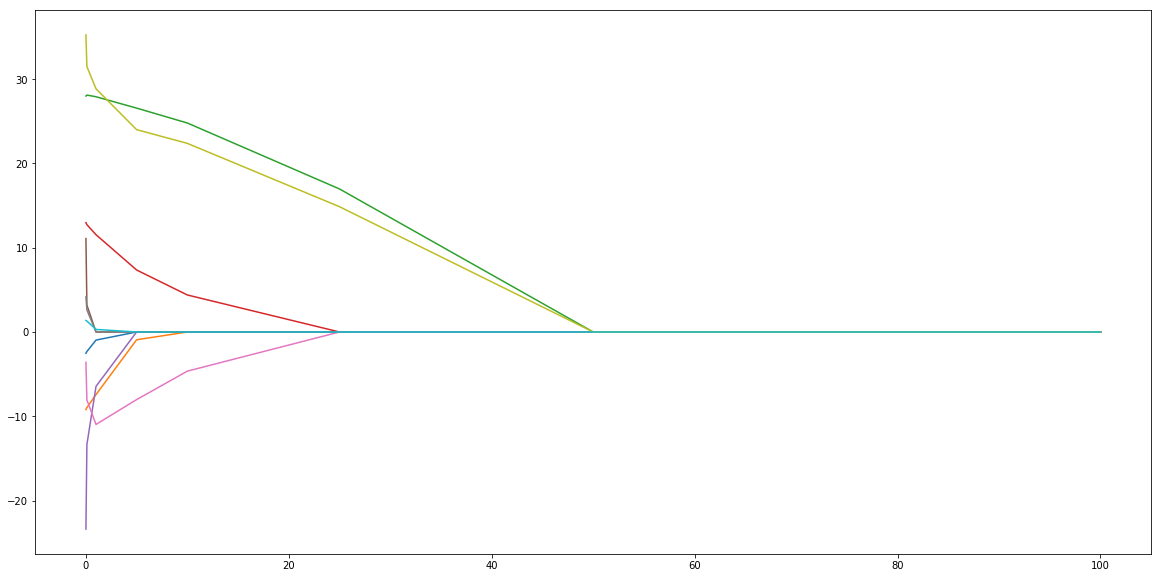

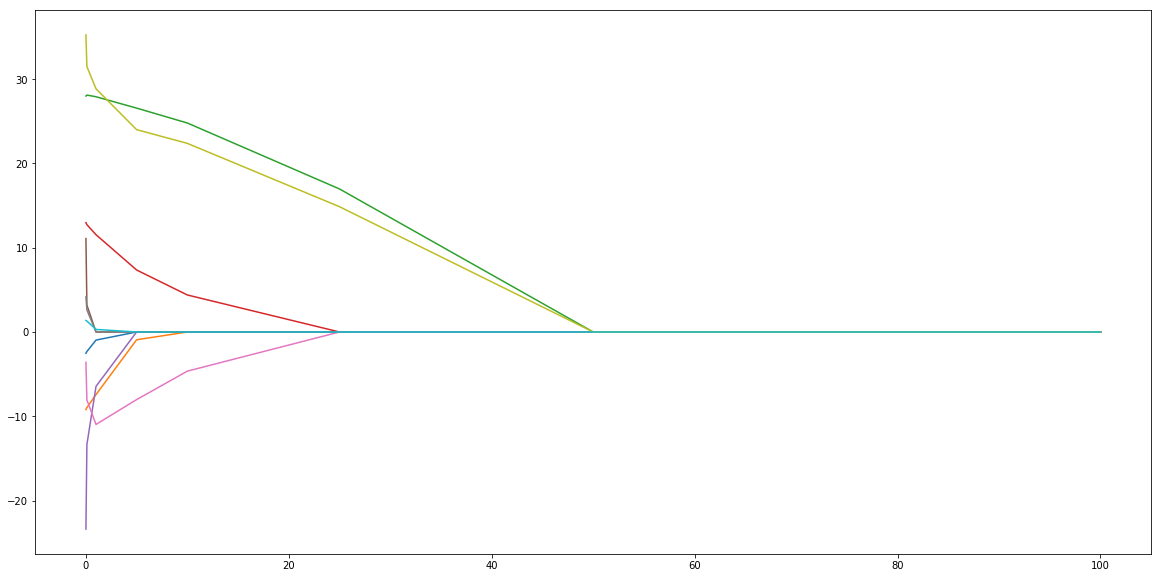

In [199]:
alphaValues = [0.005, 0.01, 0.1, 1, 5, 10, 25, 50, 75, 100]
weights_evolution= np.empty((D, len(alphaValues)))

for i, alphaValue in enumerate(alphaValues):
  elasticNet01 = ElasticNet(l1_ratio = 1, alpha = alphaValue)
  elasticNet01.fit(X_train, Y_train)
  weights_evolution[i, :] = elasticNet01.coef_

plt.figure(figsize=[20,10])
plt.plot(alphaValues, weights_evolution)
plt.show()

Although we got an l1_ratio on the CV without all the features, in order to see how the weights converge to zero, we set a fixed value of it as 1, so we use an entire Lasso method.

But sice the best value of l1_ratio is 0.01 (almost all L2 penalization), to do the feature selection we will proceed as the Ridge Feature Selection with prunning.

Take into account that we will be using the CV values for l1_ratio and alpha that we got in the ElasticNetCV before evaluating the weights evolution.

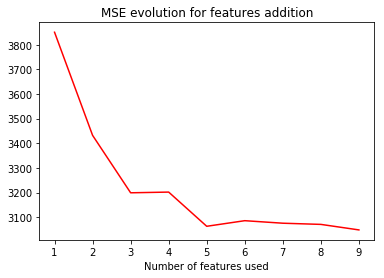

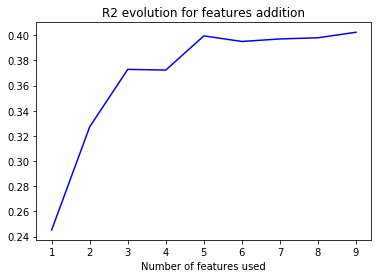

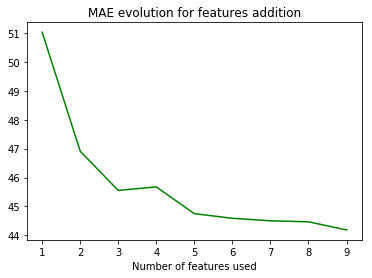

For this feature selection method, we can conclude, that the best features for the training per metric is:
MSE:  [2 8 3 6 1 5 7 4 9]
R2:  [2 8 3 6 1 5 7 4 9]
MAE:  [2 8 3 6 1 5 7 4 9]


In [200]:
MSE_ElasticNet = []
MAE_ElasticNet = []
R2_ElasticNet = []

for i in range(1, len(index_weights_byAbsValue)):
  elasticNet01 = ElasticNet(l1_ratio = elasticNet.l1_ratio_, alpha = elasticNet.alpha_)

  # In the next line, we can see how in each iteration, it will be taking the an extra feature than the previouse iteration
  # So in order to check that, we can just uncomment the next code line:

  # print('Features selected for training number',  i, ':', index_weights_byAbsValue[0:i])

  elasticNet01.fit(X_train[:, index_weights_byAbsValue[0:i]], Y_train)
  
  predictions = elasticNet01.predict(X_test[:, index_weights_byAbsValue[0:i]])

  MSE_ElasticNet.append(mean_squared_error(Y_test, predictions))
  R2_ElasticNet.append(r2_score(Y_test, predictions))
  MAE_ElasticNet.append(mean_absolute_error(Y_test, predictions))

plt.figure()
plt.plot(range(1, len(index_weights_byAbsValue)), MSE_ElasticNet, 'r')
plt.title('MSE evolution for features addition')
plt.xlabel('Number of features used')

plt.figure()
plt.plot(range(1, len(index_weights_byAbsValue)), R2_ElasticNet, 'b')
plt.title('R2 evolution for features addition')
plt.xlabel('Number of features used')

plt.figure()
plt.plot(range(1, len(index_weights_byAbsValue)), MAE_ElasticNet, 'g')
plt.title('MAE evolution for features addition')
plt.xlabel('Number of features used')
plt.show()

print('For this feature selection method, we can conclude, that the best features for the training per metric is:')
print('MSE: ', index_weights_byAbsValue[0:MSE_ElasticNet.index(min(MSE_ElasticNet))+1])
print('R2: ', index_weights_byAbsValue[0:R2_ElasticNet.index(max(R2_ElasticNet))+1])
print('MAE: ', index_weights_byAbsValue[0:MAE_ElasticNet.index(min(MAE_ElasticNet))+1])

So as we can see, the curves converge similarly to the other methods, but in this case we get that the best scores we get them with all the features.

In a usual day by day problem, we will need to set the criteria in order to choose or not the features e.g. if some feature just improves a little the performance, sometimes it won't be usefull to use it for trainnig.
